In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
import matplotlib.dates as mdates
from itertools import cycle, islice
import seaborn as srn

In [3]:
# Lendo o arquivo contendo os novos casos, total de casos, total de mortes, novas mortes, etc.
dados = pd.read_csv("owid-covid-data.csv", sep=",")
dados

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72585,ZWE,Africa,Zimbabwe,2021-02-27,36058.0,14.0,41.429,1463.0,0.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72586,ZWE,Africa,Zimbabwe,2021-02-28,36089.0,31.0,41.857,1463.0,0.0,3.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72587,ZWE,Africa,Zimbabwe,2021-03-01,36115.0,26.0,36.143,1468.0,5.0,3.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
72588,ZWE,Africa,Zimbabwe,2021-03-02,36148.0,33.0,34.000,1472.0,4.0,3.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [4]:
## Resgatando apenas os dados do Brasil.
dados_brasil = dados.loc[dados['location'] == 'Brazil']
dados_brasil['date'] = pd.to_datetime(dados_brasil['date'])
dados_brasil

<ipython-input-4-06c4efc47384>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_brasil['date'] = pd.to_datetime(dados_brasil['date'])


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9330,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9331,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9332,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9333,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9334,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,BRA,South America,Brazil,2021-02-27,10517232.0,61602.0,54012.000,254221.0,1386.0,1177.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9698,BRA,South America,Brazil,2021-02-28,10551259.0,34027.0,54726.429,254942.0,721.0,1205.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9699,BRA,South America,Brazil,2021-03-01,10587001.0,35742.0,55977.286,255720.0,778.0,1225.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9700,BRA,South America,Brazil,2021-03-02,10646926.0,59925.0,55578.714,257361.0,1641.0,1261.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


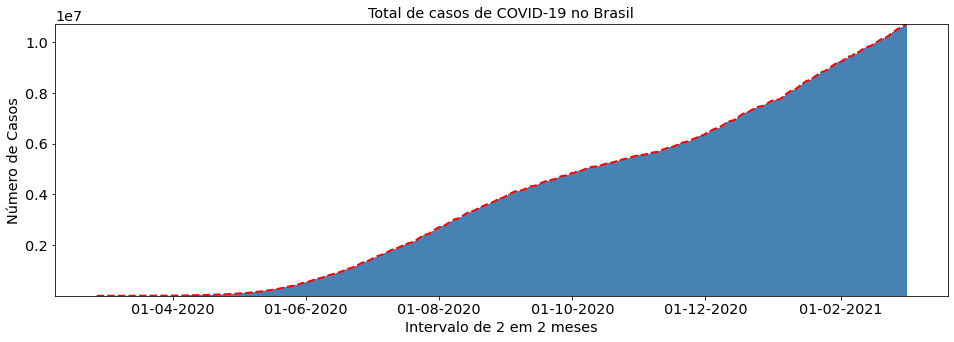

In [5]:
# Gerando um barplot do nº de casos de Covid no Brasil com intervalo de 2 em 2 meses.


fig = plt.figure(figsize = (16, 5)) 
plt.bar('date','total_cases',data=dados_brasil, width=1, align='center', color="steelblue")
plt.plot('date','total_cases',data=dados_brasil, color='red', linestyle='--', linewidth=2)


plt.ylim([1,dados_brasil['total_cases'].max()])

plt.xlabel("Intervalo de 2 em 2 meses")
plt.ylabel("Número de Casos")
plt.title("Total de casos de COVID-19 no Brasil")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))




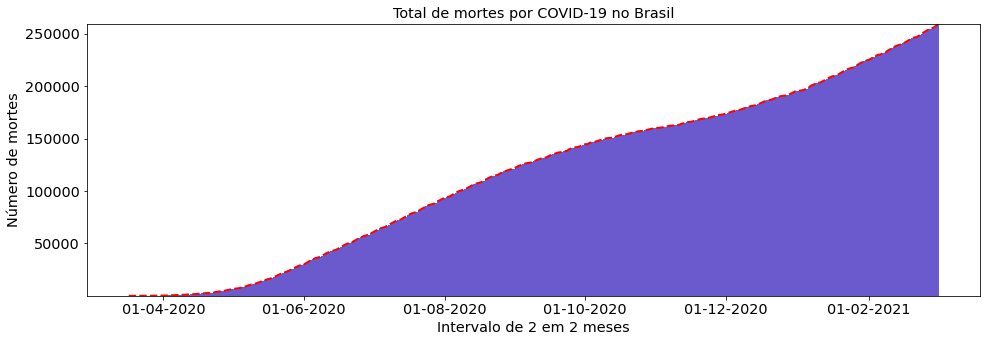

In [6]:
fig = plt.figure(figsize = (16, 5)) 
plt.bar('date','total_deaths',data=dados_brasil, width=1, align='center', color="slateblue")
plt.plot('date','total_deaths',data=dados_brasil, color='red', linestyle='--', linewidth=2)


plt.ylim([1,dados_brasil['total_deaths'].max()])

plt.xlabel("Intervalo de 2 em 2 meses")
plt.ylabel("Número de mortes")
plt.title("Total de mortes por COVID-19 no Brasil")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

Text(0.5, 1.0, 'Países com maiores casos de COVID-19 no mundo')

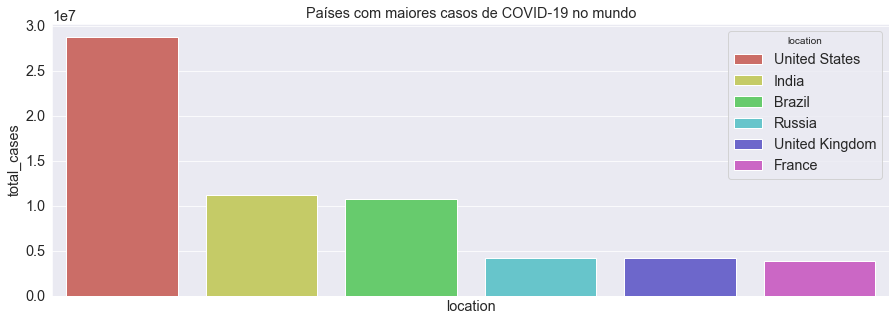

In [7]:
maiores_casos = dados.loc[(dados['date'] == '2021-03-03')]
maiores_casos = maiores_casos.loc[~maiores_casos['iso_code'].str.contains("OWID")]
maiores_casos = maiores_casos.sort_values(by = "total_cases", ascending=False).head(6)

srn.set_style('darkgrid')
srn.barplot(x = "location", y = "total_cases", data=maiores_casos, hue="location", dodge=False, palette = 'hls')
plt.xticks([])
plt.title("Países com maiores casos de COVID-19 no mundo")


Text(0.5, 1.0, 'Países com maiores números de morte por COVID-19 no mundo')

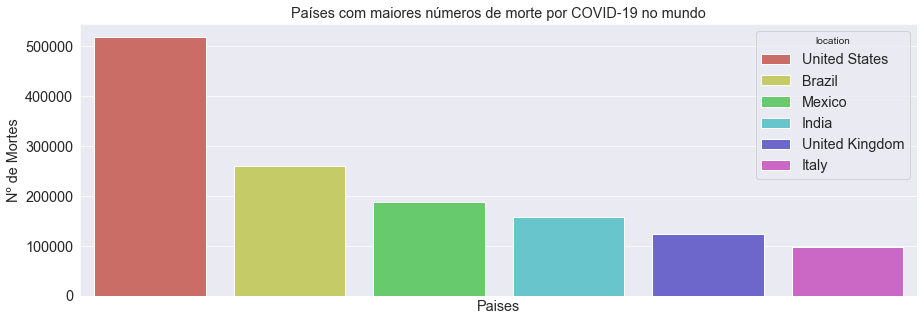

In [8]:
maiores_tmorte = dados.loc[(dados['date'] == '2021-03-03')]
maiores_tmorte = maiores_tmorte.loc[~maiores_tmorte['iso_code'].str.contains("OWID")]
maiores_tmorte = maiores_tmorte.sort_values(by = "total_deaths", ascending=False).head(6)

srn.set_style('darkgrid')
srn.barplot(x = "location", y = "total_deaths", data=maiores_tmorte, hue="location", dodge=False, palette = 'hls')
plt.xticks([])
plt.xlabel("Paises")
plt.ylabel("Nº de Mortes")
plt.title("Países com maiores números de morte por COVID-19 no mundo")
